In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

In [38]:
con_df = pd.read_csv('/Users/yongjaegim/Desktop/국토교통부_공모전/국토교통부_공모전_완성본/concrete.csv')

In [39]:
con_df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [40]:
con_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [41]:
con_df.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [42]:
con_df.isna().sum()
# 결측치 없음

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [43]:
num_col = con_df.columns

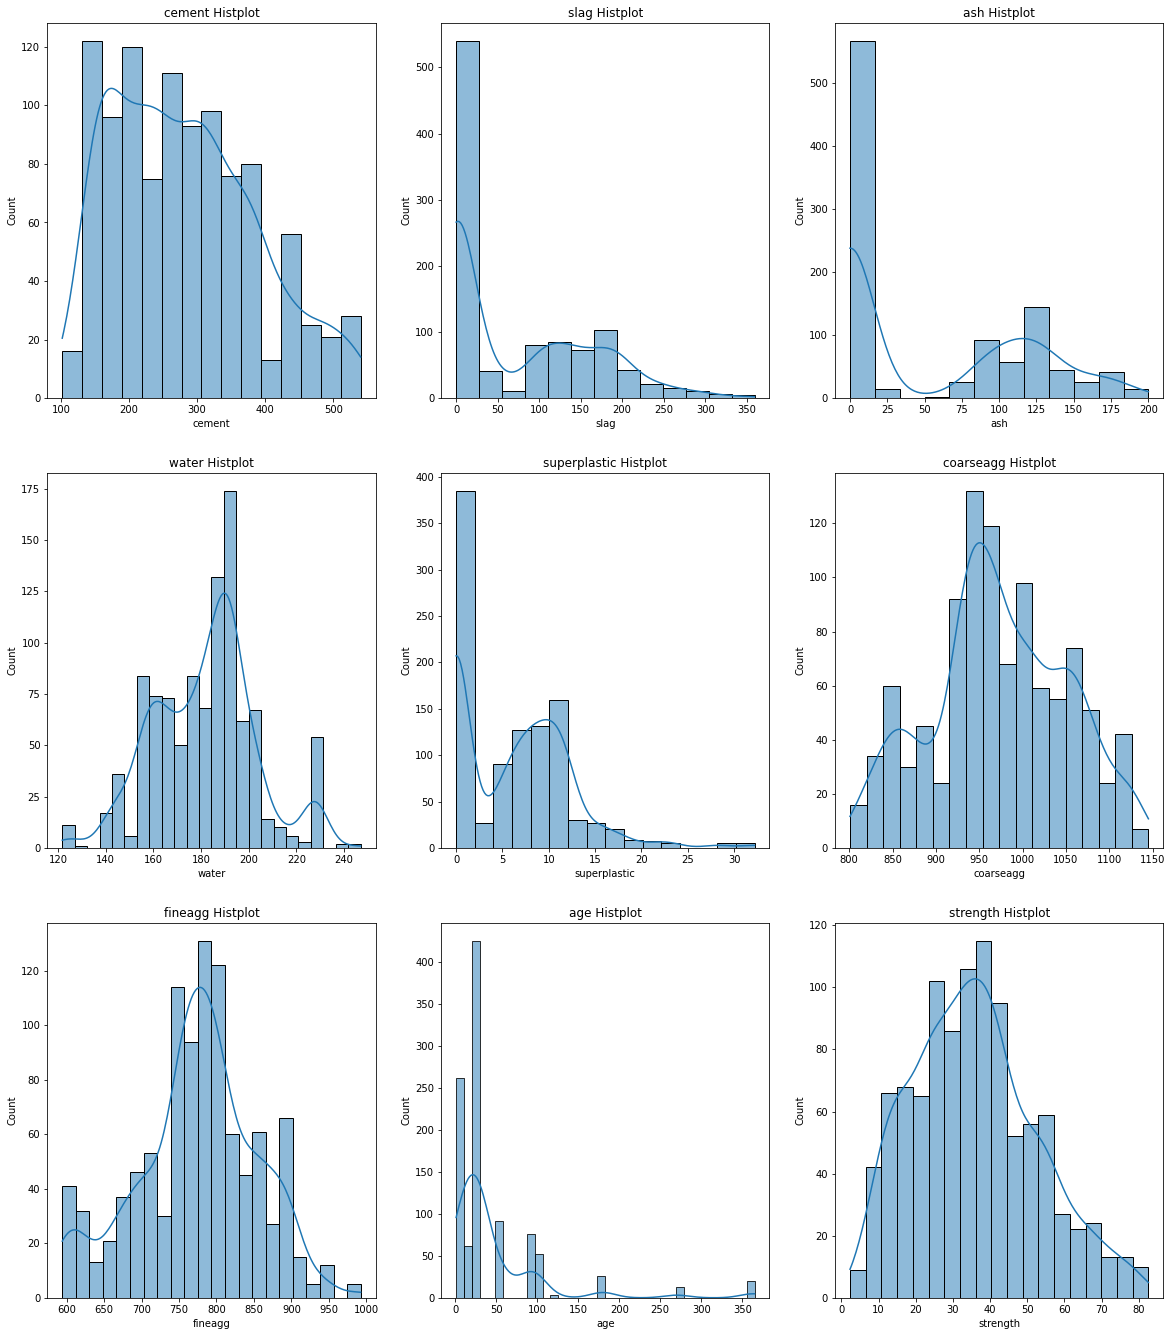

In [44]:
plt.figure(figsize=(20,40))
for i in range(len(num_col)):
    plt.subplot(5,3,i+1)
    plt.title('{0} Histplot'.format(num_col[i]))
    sns.histplot(data = con_df, x = con_df['{0}'.format(num_col[i])] , kde = True)

cement,slag, ash, superplastic, age 컬럼은 우측꼬리분포를 보이고 있음  
log1p 작업을 통해 우측꼬리 분포를 줄여야함  
age는 log로 작업  

In [35]:
con_df.cement = np.log1p(con_df.cement)
con_df.slag = np.log1p(con_df.slag)
con_df.ash = np.log1p(con_df.ash)
con_df.superplastic = np.log1p(con_df.superplastic)
con_df.age = np.log(con_df.age) # age는 log로 작업

/Users/yongjaegim/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/yongjaegim/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


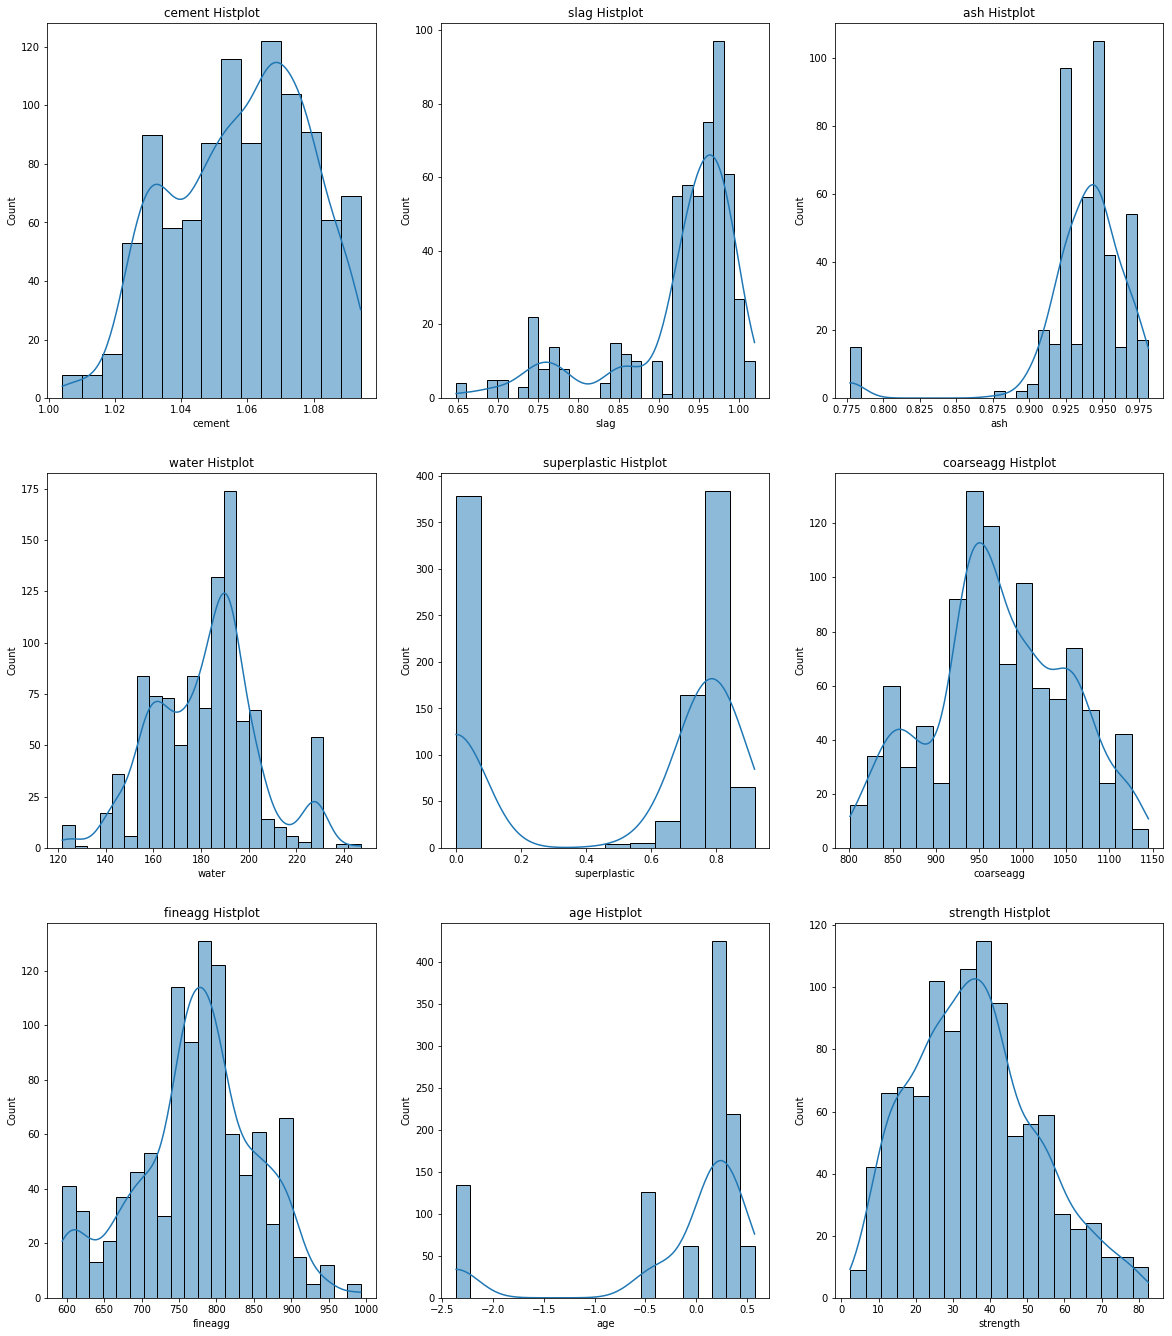

In [36]:
plt.figure(figsize=(20,40))
for i in range(len(num_col)):
    plt.subplot(5,3,i+1)
    plt.title('{0} Histplot'.format(num_col[i]))
    sns.histplot(data = con_df, x = con_df['{0}'.format(num_col[i])] , kde = True)

<AxesSubplot:>

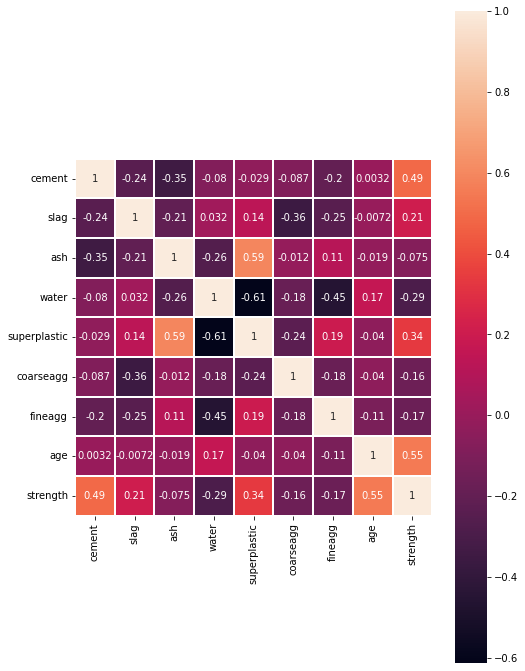

In [29]:
plt.figure(figsize=(8,12))
sns.heatmap(con_df.corr(), linewidths = 0.1, vmax = 1.0, square = True, linecolor = "white", annot = True)

corr을 보았을 때 뚜렷하게 상관관계를 보이는건 없으나 strength와의 상관계수는  
age -> cenment -> superplastic 순으로 낮은 상관관계를 보이고 있음

In [45]:
col = con_df.iloc[:,:-1].columns

In [46]:
olsd = sm.OLS(con_df.strength, con_df[col])

In [47]:
aa = olsd.fit()
aa.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               strength   R-squared (uncentered):                   0.931
Model:                            OLS   Adj. R-squared (uncentered):              0.931
Method:                 Least Squares   F-statistic:                              1732.
Date:                Wed, 09 Feb 2022   Prob (F-statistic):                        0.00
Time:                        11:16:24   Log-Likelihood:                         -3869.4
No. Observations:                1030   AIC:                                      7755.
Df Residuals:                    1022   BIC:                                      7794.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
cement           0.1134      0.004     26.692      0.000       0.105       0.122
slag             0.0962      0.005     18.488      0.000       0.086       0.106
ash              0.0793      0.008     10.077      0.000       0.064       0.095
water           -0.1822      0.016    -11.345      0.000      -0.214      -0.151
superplastic     0.2647      0.088      3.008      0.003       0.092       0.437
coarseagg        0.0103      0.003      3.364      0.001       0.004       0.016
fineagg          0.0113      0.004      3.188      0.001       0.004       0.018
age              0.1140      0.005     21.031      0.000       0.103       0.125
==============================================================================
Omnibus:                        5.325   Durbin-Watson:                   1.869
Prob(Omnibus):                  0.070   Jarque-Bera (JB):                5.269
Skew:                          -0.175   Prob(JB):                       0.0717
Kurtosis:                       3.031   Cond. No.                         354.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""